In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import rasterio

In [21]:
# Load RGB satellite images
img_rgb = cv2.imread('data/20230215-SE2B-CGG-GBR-MS3-L3-RGB-preview.jpg')

# Open the LiDAR image using rasterio
with rasterio.open('data/DSM_TQ0075_P_12757_20230109_20230315.tif') as lidar_src:
    img_lidar = lidar_src.read(1)  # Read the first band (assuming single-band image)

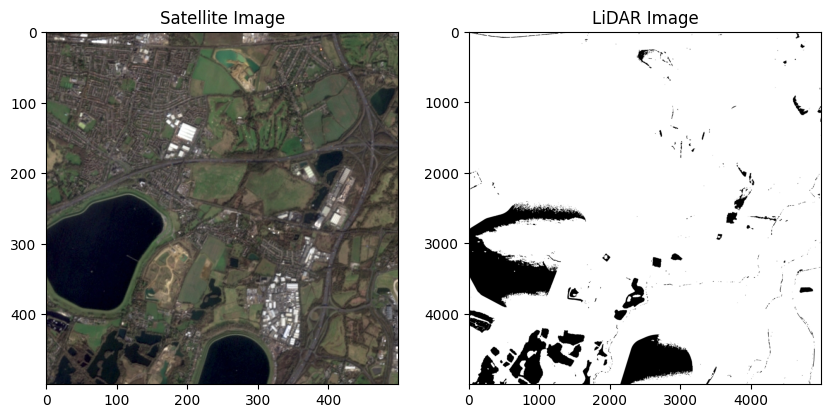

In [22]:
# Show the images for verification
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Satellite Image')
plt.imshow(img_rgb[:, :, ::-1])
# Show the LiDAR image
plt.subplot(1, 2, 2)
plt.imshow(img_lidar, cmap='gray')
plt.title('LiDAR Image')
# plt.colorbar()
plt.show()

In [24]:
img_interp = cv2.resize(img_rgb, img_lidar.shape[::-1], interpolation=cv2.INTER_CUBIC)
img_lidar = np.clip(img_lidar, min=0, max=None)

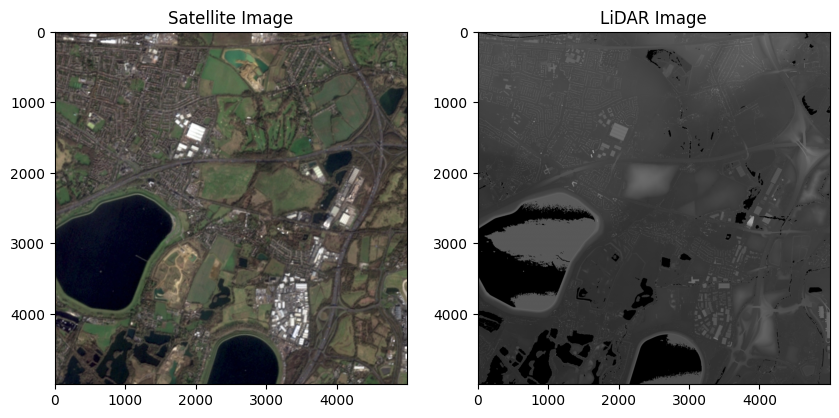

In [25]:
# Show the images for verification
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Satellite Image')
plt.imshow(img_interp[:, :, ::-1])
# Show the LiDAR image
plt.subplot(1, 2, 2)
plt.imshow(img_lidar, cmap='gray')
plt.title('LiDAR Image')
# plt.colorbar()
plt.show()

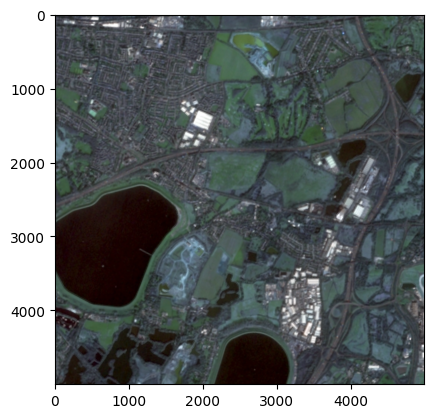

In [30]:
img_up = np.zeros_like(img_interp)
h, w = img_interp.shape[:2]
for i in range(h):
    for j in range(w):
        x1, x2 = max(0, j-5), min(w, j+6)
        y1, y2 = max(0, i-5), min(h, i+6)
        filter = img_lidar[y1: y2, x1:x2] - img_lidar[i, j]
        filter = np.abs(filter)
        if np.sum(filter) == 0:
            filter = np.ones_like(filter)
        filter /= np.sum(filter)
        for c in range(3):
            img_up[i, j, c] = np.sum(img_interp[y1:y2, x1:x2, c] * filter)
cv2.imwrite('out/out.jpg', img_up)
plt.imshow(img_up)